In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("labels.csv")
df

,Id,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,63
1,0009c66b9439883ba2750fb825e1d7db,42
2,0013fd999caf9a3efe1352ca1b0d937e,28
3,0018df346ac9c1d8413cfcc888ca8246,15
4,001dc955e10590d3ca4673f034feeef2,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,15
9908,ffcc8532d76436fc79e50eb2e5238e45,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,20
9910,fff19e2ce11718548fa1c5d039a5192a,20


## Treat Pawpularity as a continuous variable in the prediction model

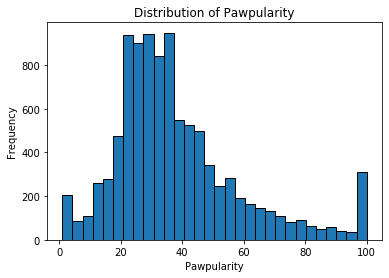

In [3]:
# Plot the distribution of the "Pawpularity" column
plt.hist(df['Pawpularity'], bins=30, edgecolor='black')
plt.xlabel('Pawpularity')
plt.ylabel('Frequency')
plt.title('Distribution of Pawpularity')
plt.show()

### Preprocess the data

In [13]:
# Define the image directory
image_dir = "images"

# Initialize lists to store images and pawpularity values
images = []
pawpularity = []

# Define the desired image size
image_size = (64, 64)

# Iterate over the IDs in the DataFrame
for id in df["Id"]:
    # Construct the image filename by appending the ".jpg" extension
    filename = id + ".jpg"

    # Construct the path to the image file
    image_path = os.path.join(image_dir, filename)

    # Load and preprocess the image
    image = load_img(image_path, target_size=image_size)
    image = img_to_array(image) / 255.0

    # Add the preprocessed image to the images list
    images.append(image)

    # Extract the corresponding pawpularity value from the DataFrame
    pawpularity_value = df.loc[df["Id"] == id, "Pawpularity"].values[0]
    pawpularity.append(pawpularity_value)

# Convert the images and pawpularity lists to NumPy arrays
images = np.array(images)
pawpularity = np.array(pawpularity)

# Reshape the pawpularity array to match the shape of the images array
pawpularity = pawpularity.reshape(-1, 1)

# Normalize the pawpularity values using Min-Max scaling
# scaler = MinMaxScaler()
# pawpularity = scaler.fit_transform(pawpularity)

In [16]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, pawpularity, test_size=0.2, random_state=42)

# Print the shapes of x_train, x_test, y_train, and y_test
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7929, 64, 64, 3)
y_train shape: (7929, 1)
x_test shape: (1983, 64, 64, 3)
y_test shape: (1983, 1)


## Tuning Hyperparameters

In [33]:
# Define hyperparameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
num_filters = [32, 64, 128]
filter_sizes = [(3, 3), (5, 5), (7, 7)]
num_dense_layers = [2, 3]

# Initialize variables to store best hyperparameters and performance
best_learning_rate = None
best_num_filters = None
best_filter_size = None
best_num_dense_layers = None
best_mse = float("inf")

# Iterate over hyperparameters
for lr in learning_rates:
    for filters in num_filters:
        for size in filter_sizes:
            for dense_layers in num_dense_layers:
                # Create the CNN model
                model = tf.keras.Sequential()
                model.add(layers.Conv2D(filters, size, activation="relu", input_shape=(64, 64, 3)))
                model.add(layers.MaxPooling2D((2, 2)))
                for _ in range(dense_layers):
                    model.add(layers.Dense(64, activation="relu"))
                model.add(layers.Flatten())
                model.add(layers.Dense(1, activation="linear"))
                
                # Compile the model
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss="mean_squared_error")
                
                # Train the model
                model.fit(x_train, y_train, epochs=10, verbose=1)
                
                # Evaluate the model on the validation set
                y_pred = model.predict(x_test)
                mse = mean_squared_error(y_test, y_pred)
                
                # Check if this configuration is the best so far
                if mse < best_mse:
                    best_learning_rate = lr
                    best_num_filters = filters
                    best_filter_size = size
                    best_num_dense_layers = dense_layers
                    best_mse = mse

# Print the best hyperparameters and performance
print("Best learning rate:", best_learning_rate)
print("Best number of filters:", best_num_filters)
print("Best filter size:", best_filter_size)
print("Best number of dense layers:", best_num_dense_layers)
print("Best MSE:", best_mse)

Epoch 1/10
248/248 [==============================] - 8s 32ms/step - loss: 0.0909
Epoch 2/10
248/248 [==============================] - 8s 33ms/step - loss: 0.0438
Epoch 3/10
248/248 [==============================] - 8s 32ms/step - loss: 0.0423
Epoch 4/10
248/248 [==============================] - 8s 32ms/step - loss: 0.0395
Epoch 5/10
248/248 [==============================] - 8s 31ms/step - loss: 0.0350
Epoch 6/10
248/248 [==============================] - 9s 35ms/step - loss: 0.0316
Epoch 7/10
248/248 [==============================] - 14s 57ms/step - loss: 0.0292
Epoch 8/10
248/248 [==============================] - 9s 38ms/step - loss: 0.0249
Epoch 9/10
248/248 [==============================] - 9s 36ms/step - loss: 0.0228
Epoch 10/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0194
Epoch 1/10
248/248 [==============================] - 11s 45ms/step - loss: 0.0683
Epoch 2/10
248/248 [==============================] - 12s 47ms/step - loss: 0.0438
Epoch 3/10


Epoch 7/10
248/248 [==============================] - 10s 39ms/step - loss: 0.0475
Epoch 8/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0469
Epoch 9/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0449
Epoch 10/10
248/248 [==============================] - 10s 39ms/step - loss: 0.0458
Epoch 1/10
248/248 [==============================] - 10s 40ms/step - loss: 4.1634
Epoch 2/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0521
Epoch 3/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0430
Epoch 4/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0428
Epoch 5/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0428
Epoch 6/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0428
Epoch 7/10
248/248 [==============================] - 10s 40ms/step - loss: 0.0428
Epoch 8/10
248/248 [==============================] - 10s 41ms/step - loss: 0.0428
Epo

Epoch 3/10
248/248 [==============================] - 12s 49ms/step - loss: 0.6931
Epoch 4/10
248/248 [==============================] - 12s 48ms/step - loss: 0.6605
Epoch 5/10
248/248 [==============================] - 12s 48ms/step - loss: 0.6224
Epoch 6/10
248/248 [==============================] - 12s 48ms/step - loss: 0.5797
Epoch 7/10
248/248 [==============================] - 12s 48ms/step - loss: 0.5332
Epoch 8/10
248/248 [==============================] - 12s 48ms/step - loss: 0.4840
Epoch 9/10
248/248 [==============================] - 12s 49ms/step - loss: 0.4331
Epoch 10/10
248/248 [==============================] - 12s 48ms/step - loss: 0.3818
Epoch 1/10
248/248 [==============================] - 12s 47ms/step - loss: 20773058.0000
Epoch 2/10
248/248 [==============================] - 12s 47ms/step - loss: 0.7285
Epoch 3/10
248/248 [==============================] - 12s 48ms/step - loss: 0.7163
Epoch 4/10
248/248 [==============================] - 12s 48ms/step - loss: 0.7

## Then use the hyperparameters that give us best MSE to create the model

In [18]:
# Create the CNN model
model = tf.keras.Sequential()

# Add the convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="linear"))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
248/248 [==============================] - 14s 56ms/step - loss: 472.8375 - val_loss: 444.1030
Epoch 2/10
248/248 [==============================] - 15s 61ms/step - loss: 429.2018 - val_loss: 455.7831
Epoch 3/10
248/248 [==============================] - 23s 94ms/step - loss: 421.3218 - val_loss: 449.4141
Epoch 4/10
248/248 [==============================] - 30s 121ms/step - loss: 410.8760 - val_loss: 451.6507
Epoch 5/10
248/248 [==============================] - 17s 68ms/step - loss: 395.7093 - val_loss: 455.0119
Epoch 6/10
248/248 [==============================] - 17s 68ms/step - loss: 371.9485 - val_loss: 469.7047
Epoch 7/10
248/248 [==============================] - 22s 89ms/step - loss: 341.0912 - val_loss: 494.4971
Epoch 8/10
248/248 [==============================] - 20s 80ms/step - loss: 303.2315 - val_loss: 527.5176
Epoch 9/10
248/248 [==============================] - 18s 72ms/step - loss: 252.2645 - val_loss: 541.3567
Epoch 10/10
248/248 [========================

In [19]:
loss = model.evaluate(x_test, y_test)

62/62 [==============================] - 1s 11ms/step - loss: 580.8371


In [20]:
y_pred = model.predict(x_test)

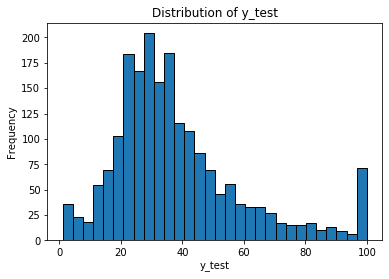

In [22]:
# Plot the distribution of the y_test
plt.hist(y_test, bins=30, edgecolor='black')
plt.xlabel('y_test')
plt.ylabel('Frequency')
plt.title('Distribution of y_test')
plt.show()

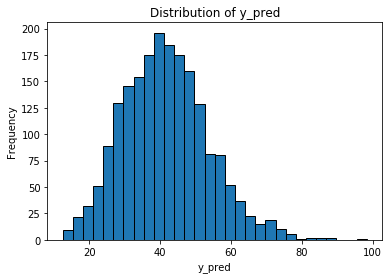

In [23]:
# Plot the distribution of the y_test
plt.hist(y_pred, bins=30, edgecolor='black')
plt.xlabel('y_pred')
plt.ylabel('Frequency')
plt.title('Distribution of y_pred')
plt.show()

In [24]:
# Define the category boundaries
boundaries = [20, 40, 60, 80]

# Categorize y_test and y_pred
y_test_categories = np.digitize(y_test, boundaries)
y_pred_categories = np.digitize(y_pred, boundaries)

In [25]:
# Calculate accuracy for each category
category_accuracy = []
for category in range(1, 6):
    y_test_category = (y_test_categories == category)
    y_pred_category = (y_pred_categories == category)
    accuracy = accuracy_score(y_test_category, y_pred_category)
    category_accuracy.append(accuracy)

# Print the accuracy for each category
for category, accuracy in enumerate(category_accuracy, start=1):
    print(f"Category {category}: Accuracy = {accuracy:.4f}")

Category 1: Accuracy = 0.5189
Category 2: Accuracy = 0.5270
Category 3: Accuracy = 0.8699
Category 4: Accuracy = 0.9314
Category 5: Accuracy = 1.0000


In [60]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Calculate precision, recall, and F1-score for each category
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_categories, y_pred_categories)

# Print precision, recall, and F1-score for each category
for category in range(1, 6):
    print(f"Category {category}:")
    print(f"Precision: {precision[category-1]:.4f}")
    print(f"Recall: {recall[category-1]:.4f}")
    print(f"F1-Score: {f1_score[category-1]:.4f}")
    print()

# Generate a classification report
classification_rep = classification_report(y_test_categories, y_pred_categories)
print(classification_rep)

Category 1:
Precision: 0.1954
Recall: 0.0625
F1-Score: 0.0947

Category 2:
Precision: 0.5129
Recall: 0.5532
F1-Score: 0.5323

Category 3:
Precision: 0.2111
Recall: 0.3535
F1-Score: 0.2643

Category 4:
Precision: 0.0682
Recall: 0.0408
F1-Score: 0.0511

Category 5:
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

              precision    recall  f1-score   support

           0       0.20      0.06      0.09       272
           1       0.51      0.55      0.53      1005
           2       0.21      0.35      0.26       430
           3       0.07      0.04      0.05       147
           4       0.00      0.00      0.00       129

    accuracy                           0.37      1983
   macro avg       0.20      0.20      0.19      1983
weighted avg       0.34      0.37      0.34      1983



# Treat Pawpularity as a categorical variable in the prediction model

In [27]:
# Define the bins and labels for recoding
bins = [0, 20, 40, 60, 80, float('inf')]
labels = [0, 1, 2, 3, 4]

# Recode the "Pawpularity" column
df["Rankings"] = pd.cut(df["Pawpularity"], bins=bins, labels=labels, include_lowest=True)

# Convert the recoded column to integer type
df["Rankings"] = df["Rankings"].astype(int)

# Convert the recoded column to a NumPy array
rankings = df["Rankings"].values

In [28]:
# Check the frequency of each category
rankings_series = pd.Series(rankings)

rankings_series.value_counts()

1    5119
2    2088
0    1417
3     727
4     561
dtype: int64

Since each category has similar counts, I will use accuracy in the model training process to select the best performence model

In [42]:
# Perform train-test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(images, rankings, test_size=0.2, random_state=42)

## Tuning Hyperparameters

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
learning_rates = [0.001, 0.01, 0.1]
num_filters = [16, 32, 64]
filter_sizes = [(3, 3), (5, 5), (7, 7)]
num_dense_layers = [2, 3]

best_accuracy = 0.0
best_hyperparams = None

# Iterate over different hyperparameter combinations
for lr in learning_rates:
    for nf in num_filters:
        for fs in filter_sizes:
            for nd in num_dense_layers:
                # Create the CNN model
                model_cat = Sequential()

                # Add convolutional layers
                model_cat.add(Conv2D(nf, fs, activation='relu', input_shape=(64, 64, 3)))
                model_cat.add(MaxPooling2D((2, 2)))
                model_cat.add(Conv2D(nf, fs, activation='relu'))
                model_cat.add(MaxPooling2D((2, 2)))
                model_cat.add(Conv2D(nf, fs, activation='relu'))

                # Flatten the output
                model_cat.add(Flatten())

                # Add dense layers
                for _ in range(nd):
                    model_cat.add(Dense(nf, activation='relu'))
                model_cat.add(Dense(5, activation='softmax'))  #5 ranking categories

                # Compile the model
                optimizer = Adam(learning_rate=lr)
                model_cat.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train the model
                model_cat.fit(x_train2, y_train2, epochs=10, validation_data=(x_test2, y_test2), verbose=1)

                # Evaluate the model
                _, accuracy = model_cat.evaluate(x_test2, y_test2, verbose=1)

                # Check if current hyperparameters give a better recall
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_hyperparams = (lr, nf, fs, nd)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:")
print("Learning Rate:", best_hyperparams[0])
print("Number of Filters:", best_hyperparams[1])
print("Filter Size:", best_hyperparams[2])
print("Number of Dense Layers:", best_hyperparams[3])
print("Best Accuracy:", best_accuracy)

Epoch 1/10
248/248 [==============================] - 8s 32ms/step - loss: 1.3215 - accuracy: 0.5153 - val_loss: 1.3262 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 8s 30ms/step - loss: 1.3032 - accuracy: 0.5163 - val_loss: 1.3248 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 7s 30ms/step - loss: 1.3005 - accuracy: 0.5163 - val_loss: 1.3284 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 8s 30ms/step - loss: 1.2922 - accuracy: 0.5163 - val_loss: 1.3343 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 8s 31ms/step - loss: 1.2856 - accuracy: 0.5160 - val_loss: 1.3382 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 8s 31ms/step - loss: 1.2703 - accuracy: 0.5175 - val_loss: 1.3422 - val_accuracy: 0.5058
Epoch 7/10
248/248 [==============================] - 8s 31ms/step - loss: 1.2514 - accuracy: 0.5185 - val_loss: 1.3552 - val_accuracy: 0.4912

Epoch 5/10
248/248 [==============================] - 14s 55ms/step - loss: 1.3035 - accuracy: 0.5163 - val_loss: 1.3307 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 14s 55ms/step - loss: 1.3021 - accuracy: 0.5163 - val_loss: 1.3342 - val_accuracy: 0.5068
Epoch 7/10
248/248 [==============================] - 14s 55ms/step - loss: 1.3036 - accuracy: 0.5163 - val_loss: 1.3209 - val_accuracy: 0.5068
Epoch 8/10
248/248 [==============================] - 14s 55ms/step - loss: 1.2988 - accuracy: 0.5163 - val_loss: 1.3246 - val_accuracy: 0.5068
Epoch 9/10
248/248 [==============================] - 14s 55ms/step - loss: 1.2987 - accuracy: 0.5163 - val_loss: 1.3274 - val_accuracy: 0.5068
Epoch 10/10
62/62 [==============================] - 1s 9ms/step - loss: 1.3210 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 12s 48ms/step - loss: 1.3150 - accuracy: 0.5139 - val_loss: 1.3373 - val_accuracy: 0.5068
Epoch 2/10
248/248 [=================

Epoch 9/10
248/248 [==============================] - 20s 81ms/step - loss: 1.3000 - accuracy: 0.5163 - val_loss: 1.3241 - val_accuracy: 0.5068
Epoch 10/10
62/62 [==============================] - 1s 16ms/step - loss: 1.3253 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 20s 83ms/step - loss: 1.3394 - accuracy: 0.5007 - val_loss: 1.3380 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 20s 82ms/step - loss: 1.3168 - accuracy: 0.5163 - val_loss: 1.3249 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 20s 82ms/step - loss: 1.3073 - accuracy: 0.5163 - val_loss: 1.3206 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 20s 82ms/step - loss: 1.3082 - accuracy: 0.5163 - val_loss: 1.3202 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 20s 83ms/step - loss: 1.3002 - accuracy: 0.5163 - val_loss: 1.3205 - val_accuracy: 0.5068
Epoch 6/10
248/248 [================

248/248 [==============================] - 50s 201ms/step - loss: 1.3039 - accuracy: 0.5163 - val_loss: 1.3225 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 47s 192ms/step - loss: 1.3039 - accuracy: 0.5163 - val_loss: 1.3239 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 51s 206ms/step - loss: 1.3046 - accuracy: 0.5163 - val_loss: 1.3229 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 47s 190ms/step - loss: 1.3003 - accuracy: 0.5163 - val_loss: 1.3281 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 48s 192ms/step - loss: 1.3016 - accuracy: 0.5163 - val_loss: 1.3209 - val_accuracy: 0.5068
Epoch 7/10
248/248 [==============================] - 60s 240ms/step - loss: 1.3016 - accuracy: 0.5163 - val_loss: 1.3189 - val_accuracy: 0.5068
Epoch 8/10
248/248 [==============================] - 63s 252ms/step - loss: 1.3005 - accuracy: 0.5163 - val_loss: 1.3197 - val_accuracy: 0.5

Epoch 6/10
248/248 [==============================] - 11s 46ms/step - loss: 1.2997 - accuracy: 0.5163 - val_loss: 1.3271 - val_accuracy: 0.5068
Epoch 7/10
248/248 [==============================] - 12s 47ms/step - loss: 1.2997 - accuracy: 0.5163 - val_loss: 1.3227 - val_accuracy: 0.5068
Epoch 8/10
248/248 [==============================] - 12s 47ms/step - loss: 1.3003 - accuracy: 0.5163 - val_loss: 1.3240 - val_accuracy: 0.5068
Epoch 9/10
248/248 [==============================] - 11s 44ms/step - loss: 1.2990 - accuracy: 0.5163 - val_loss: 1.3213 - val_accuracy: 0.5068
Epoch 10/10
62/62 [==============================] - 1s 8ms/step - loss: 1.3205 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 15s 62ms/step - loss: 1.3427 - accuracy: 0.5115 - val_loss: 1.3209 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 17s 67ms/step - loss: 1.3004 - accuracy: 0.5163 - val_loss: 1.3221 - val_accuracy: 0.5068
Epoch 3/10
248/248 [=================

Epoch 10/10
62/62 [==============================] - 1s 13ms/step - loss: 1.3213 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 15s 60ms/step - loss: 1.4204 - accuracy: 0.5132 - val_loss: 1.3367 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 15s 61ms/step - loss: 1.3018 - accuracy: 0.5163 - val_loss: 1.3197 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 15s 60ms/step - loss: 1.3018 - accuracy: 0.5163 - val_loss: 1.3226 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 15s 61ms/step - loss: 1.3010 - accuracy: 0.5163 - val_loss: 1.3230 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 15s 60ms/step - loss: 1.2998 - accuracy: 0.5163 - val_loss: 1.3268 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 15s 61ms/step - loss: 1.3008 - accuracy: 0.5163 - val_loss: 1.3193 - val_accuracy: 0.5068
Epoch 7/10
248/248 [================

Epoch 7/10
248/248 [==============================] - 7s 30ms/step - loss: 1.3053 - accuracy: 0.5163 - val_loss: 1.3209 - val_accuracy: 0.5068
Epoch 8/10
248/248 [==============================] - 7s 29ms/step - loss: 1.3032 - accuracy: 0.5163 - val_loss: 1.3228 - val_accuracy: 0.5068
Epoch 9/10
248/248 [==============================] - 7s 30ms/step - loss: 1.3043 - accuracy: 0.5163 - val_loss: 1.3279 - val_accuracy: 0.5068
Epoch 10/10
62/62 [==============================] - 0s 6ms/step - loss: 1.3316 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 11s 43ms/step - loss: 82.3984 - accuracy: 0.5035 - val_loss: 1.3429 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 10s 41ms/step - loss: 1.3082 - accuracy: 0.5163 - val_loss: 1.3199 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 11s 43ms/step - loss: 1.3051 - accuracy: 0.5163 - val_loss: 1.3324 - val_accuracy: 0.5068
Epoch 4/10
248/248 [===================

62/62 [==============================] - 1s 8ms/step - loss: 1.3240 - accuracy: 0.5068
Epoch 1/10
248/248 [==============================] - 11s 46ms/step - loss: 7.0322 - accuracy: 0.5056 - val_loss: 1.3233 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 11s 46ms/step - loss: 1.3046 - accuracy: 0.5163 - val_loss: 1.3308 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 11s 45ms/step - loss: 1.3050 - accuracy: 0.5163 - val_loss: 1.3291 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 11s 46ms/step - loss: 1.3059 - accuracy: 0.5163 - val_loss: 1.3243 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 11s 45ms/step - loss: 1.3060 - accuracy: 0.5163 - val_loss: 1.3302 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 11s 46ms/step - loss: 1.3026 - accuracy: 0.5163 - val_loss: 1.3344 - val_accuracy: 0.5068
Epoch 7/10
248/248 [=============================

248/248 [==============================] - 45s 181ms/step - loss: 1.3069 - accuracy: 0.5163 - val_loss: 1.3237 - val_accuracy: 0.5068
Epoch 8/10
248/248 [==============================] - 44s 178ms/step - loss: 1.3068 - accuracy: 0.5163 - val_loss: 1.3226 - val_accuracy: 0.5068
Epoch 9/10
248/248 [==============================] - 44s 179ms/step - loss: 1.3085 - accuracy: 0.5163 - val_loss: 1.3364 - val_accuracy: 0.5068
Epoch 10/10
62/62 [==============================] - 3s 41ms/step - loss: 1.3437 - accuracy: 0.5068
Best Hyperparameters:
Learning Rate: 0.001
Number of Filters: 16
Filter Size: (5, 5)
Number of Dense Layers: 2
Best Accuracy: 0.5068078637123108


## Then use the hyperparameters that give us best accruacy to create the model

In [61]:
# Create the CNN model
model_cat = Sequential()

# Add convolutional layers
model_cat.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_cat.add(MaxPooling2D((2, 2)))
model_cat.add(Conv2D(64, (3, 3), activation='relu'))
model_cat.add(MaxPooling2D((2, 2)))
model_cat.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
model_cat.add(Flatten())

# Add dense layers
model_cat.add(Dense(64, activation='relu'))
model_cat.add(Dense(5, activation='softmax'))  #5 ranking categories

# Compile the model
model_cat.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_cat.fit(x_train2, y_train2, epochs=10, validation_data=(x_test2, y_test2))

Epoch 1/10
248/248 [==============================] - 17s 68ms/step - loss: 1.3205 - accuracy: 0.5115 - val_loss: 1.3256 - val_accuracy: 0.5068
Epoch 2/10
248/248 [==============================] - 17s 69ms/step - loss: 1.3051 - accuracy: 0.5163 - val_loss: 1.3235 - val_accuracy: 0.5068
Epoch 3/10
248/248 [==============================] - 16s 66ms/step - loss: 1.3026 - accuracy: 0.5163 - val_loss: 1.3245 - val_accuracy: 0.5068
Epoch 4/10
248/248 [==============================] - 17s 68ms/step - loss: 1.3008 - accuracy: 0.5163 - val_loss: 1.3245 - val_accuracy: 0.5068
Epoch 5/10
248/248 [==============================] - 16s 66ms/step - loss: 1.2963 - accuracy: 0.5163 - val_loss: 1.3222 - val_accuracy: 0.5068
Epoch 6/10
248/248 [==============================] - 16s 66ms/step - loss: 1.2887 - accuracy: 0.5165 - val_loss: 1.3266 - val_accuracy: 0.5053
Epoch 7/10
248/248 [==============================] - 19s 75ms/step - loss: 1.2761 - accuracy: 0.5163 - val_loss: 1.3360 - val_accuracy:

In [64]:
# Make predictions on the test set
y_pred_prob = model_cat.predict(x_test2)

# Convert the predicted probabilities to class labels
y_pred2 = np.argmax(y_pred_prob, axis=1)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred2)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test2, y_pred2, average='macro')
recall = recall_score(y_test2, y_pred2, average='macro')
f1 = f1_score(y_test2, y_pred2, average='macro')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test2, y_pred2)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.4462934947049924
Precision: 0.22220726247480066
Recall: 0.19625337396326112
F1-score: 0.1694900132254871
Confusion Matrix:
 [[  8 230  32   2   0]
 [ 29 835 124  13   4]
 [ 11 377  37   3   2]
 [  5 122  16   4   0]
 [  6 106  14   2   1]]


In [66]:
# Calculate precision, recall, and F1-score for each category
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test2, y_pred2)

# Print precision, recall, and F1-score for each category
for category in range(1, 6):
    print(f"Category {category}:")
    print(f"Precision: {precision[category-1]:.4f}")
    print(f"Recall: {recall[category-1]:.4f}")
    print(f"F1-Score: {f1_score[category-1]:.4f}")
    print()

# Generate a classification report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

Category 1:
Precision: 0.1356
Recall: 0.0294
F1-Score: 0.0483

Category 2:
Precision: 0.5000
Recall: 0.8308
F1-Score: 0.6243

Category 3:
Precision: 0.1659
Recall: 0.0860
F1-Score: 0.1133

Category 4:
Precision: 0.1667
Recall: 0.0272
F1-Score: 0.0468

Category 5:
Precision: 0.1429
Recall: 0.0078
F1-Score: 0.0147

              precision    recall  f1-score   support

           0       0.14      0.03      0.05       272
           1       0.50      0.83      0.62      1005
           2       0.17      0.09      0.11       430
           3       0.17      0.03      0.05       147
           4       0.14      0.01      0.01       129

    accuracy                           0.45      1983
   macro avg       0.22      0.20      0.17      1983
weighted avg       0.33      0.45      0.35      1983



## Choose my final model

When comparing accuracy, precision, recall, and f1-score, model 1 seems to perform better than the model_cat, so I will choose the first model to be my final cuteness ranking prediction model.

In [26]:
# Save model architecture as JSON
model_json = model.to_json()
with open('rater_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights('rater_model_weights.h5')